In [1]:
# So we can load files from other sub-directories, e.g. datasets.
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from unlabeled_extrapolation.datasets import breeds
from unlabeled_extrapolation.datasets import imagenet
from unlabeled_extrapolation.models import imnet_resnet
import torch
import torchvision
import torchvision.datasets as datasets
importlib.reload(imagenet)

<module 'unlabeled_extrapolation.datasets.imagenet' from '/juice/scr/ananya/cifar_experiments/unlabeled_extrapolation/unlabeled_extrapolation/datasets/imagenet.py'>

# View ImageNet

In [3]:
imagenet_root = '/scr/biggest/imagenet/'

In [4]:
train_examples = datasets.ImageFolder(root=imagenet_root + 'train/', transform=None)
# iid_loader = torch.utils.data.DataLoader(iid_examples, batch_size=256, shuffle=False,
#                                          num_workers=4, pin_memory=True)
val_examples = datasets.ImageFolder(root=imagenet_root + 'val/', transform=None)
# iid_loader = torch.utils.data.DataLoader(iid_examples, batch_size=256, shuffle=False,
#                                          num_workers=4, pin_memory=True)
rendition_examples = datasets.ImageFolder(root='/u/scr/nlp/imagenet/imagenet-r', transform=None)

In [5]:
print(len(train_examples))

1281167


In [6]:
train_classes = train_examples.classes
val_classes = val_examples.classes
r_classes = rendition_examples.classes
r_indices = [1, 2, 4, 6, 8, 9, 11, 13, 22, 23, 26, 29, 31, 39, 47, 63, 71, 76, 79, 84, 90, 94, 96, 97, 99, 100, 105, 107, 113, 122, 125, 130, 132, 144, 145, 147, 148, 150, 151, 155, 160, 161, 162, 163, 171, 172, 178, 187, 195, 199, 203, 207, 208, 219, 231, 232, 234, 235, 242, 245, 247, 250, 251, 254, 259, 260, 263, 265, 267, 269, 276, 277, 281, 288, 289, 291, 292, 293, 296, 299, 301, 308, 309, 310, 311, 314, 315, 319, 323, 327, 330, 334, 335, 337, 338, 340, 341, 344, 347, 353, 355, 361, 362, 365, 366, 367, 368, 372, 388, 390, 393, 397, 401, 407, 413, 414, 425, 428, 430, 435, 437, 441, 447, 448, 457, 462, 463, 469, 470, 471, 472, 476, 483, 487, 515, 546, 555, 558, 570, 579, 583, 587, 593, 594, 596, 609, 613, 617, 621, 629, 637, 657, 658, 701, 717, 724, 763, 768, 774, 776, 779, 780, 787, 805, 812, 815, 820, 824, 833, 847, 852, 866, 875, 883, 889, 895, 907, 928, 931, 932, 933, 934, 936, 937, 943, 945, 947, 948, 949, 951, 953, 954, 957, 963, 965, 967, 980, 981, 983, 988]
trimmed_v = [val_classes[i] for i in r_indices]

In [7]:
for t, v in zip(train_classes, val_classes):
    assert t == v
print(len(train_classes), len(val_classes))
print(train_classes[-1])  # Random extra class in train we can ignore

1001 1000
qqadf


In [8]:
trimmed_v == r_classes

True

In [26]:
# Use our loaders.
train_examples = imagenet.ImageNet(root=imagenet_root, split='train', transform=None)
val_examples = imagenet.ImageNet(root=imagenet_root, split='val', transform=None)
rendition_examples = imagenet.ImageNet(root='/u/scr/nlp/imagenet/', split='imagenet-r', transform=None)
v2_examples = imagenet.ImageNet(root='/u/scr/nlp/imagenet/', split='imagenetv2-matched-frequency-format-val', transform=None)


In [27]:
print(len(val_examples))

50000


0


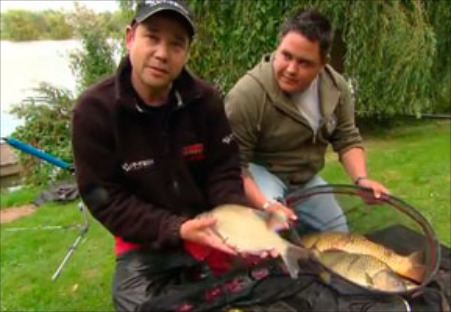

In [29]:
print(v2_examples[1][1])
v2_examples[1][0]

# Breeds

In [2]:
dataset = breeds.Breeds(root='/u/scr/nlp/imagenet/', breeds_name='entity30', source=True, split='train')

In [3]:
len(dataset._image_paths_by_class)

154263

In [4]:
print(dataset._subclasses)

[[64, 56, 57, 52], [11, 10, 20, 19], [44, 45, 40, 46], [70, 73, 71, 75], [146, 140, 134, 127], [124, 123, 125, 118], [171, 359, 181, 253], [318, 308, 311, 325], [355, 353, 340, 345], [372, 379, 383, 367], [391, 0, 396, 392], [460, 716, 877, 421], [454, 483, 668, 467], [742, 707, 650, 508], [502, 630, 638, 770], [400, 411, 655, 568], [715, 584, 793, 452], [897, 651, 521, 882], [647, 499, 505, 813], [531, 409, 704, 635], [627, 779, 665, 511], [566, 641, 579, 881], [552, 678, 443, 906], [795, 543, 522, 752], [659, 899, 441, 898], [749, 507, 695, 783], [510, 625, 403, 871], [964, 935, 963, 933], [939, 943, 942, 944], [949, 953, 955, 948]]


ape


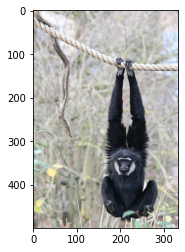

In [101]:
import matplotlib.pyplot as plt
idx = 40001
plt.imshow(dataset[idx][0])
print(dataset._label_map[dataset[idx][1]])